## Wigner distribution

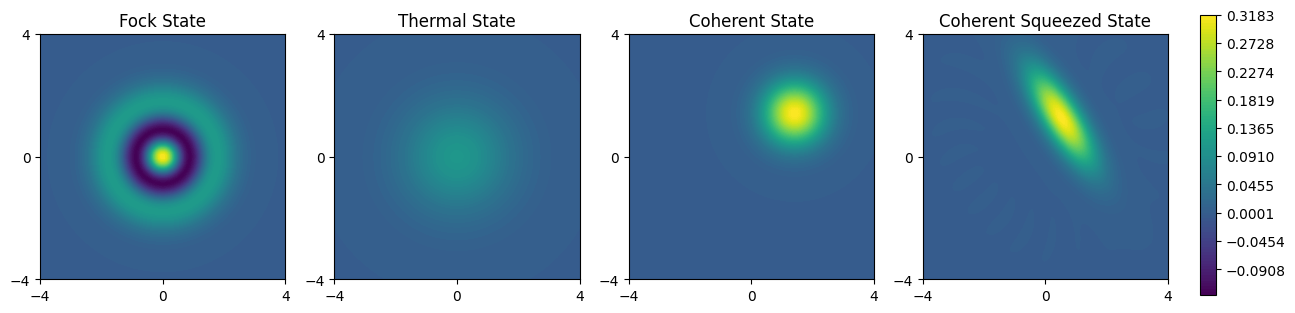

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

N = 20  # Dimension of the Hilbert space
vac = basis(N, 0)  # Vacuum state
xvec = np.linspace(-4, 4, 100)

# Generate density matrices for different states
# Fock state
rho_fock = fock_dm(N, 2)

# Thermal state
rho_thermal = thermal_dm(N, 1)   

# Coherent state
alpha = complex(1.0, 1.0)  # Displacement parameter (complex value generally)
coherent_state = coherent(N, alpha)
rho_coherent = coherent_dm(N, alpha)  # Coherent state

# Coherent squeezed state
chi = complex(0.25, 0.5)  # Squeezed parameter
rho_coherent_squeezed = ket2dm(squeeze(N, chi) * coherent_state)

# Calculate the Wigner function for each state
W_fock = wigner(rho_fock, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_coherent = wigner(rho_coherent, xvec, xvec)
W_coherent_squeezed = wigner(rho_coherent_squeezed, xvec, xvec)

# Store the states and their corresponding Wigner functions in a dictionary
W_states = {
    "Fock State": W_fock,
    "Thermal State": W_thermal,
    "Coherent State": W_coherent,
    "Coherent Squeezed State": W_coherent_squeezed
}

fig, axes = plt.subplots(1, 4, figsize=(16, 4), gridspec_kw={'width_ratios': [1, 1, 1, 1]})
plt.subplots_adjust(right=0.83)  # Adjust the right margin to make room for the colorbar

# Find the global minimum and maximum of the Wigner functions
global_min = min(W.min() for W in W_states.values())
global_max = max(W.max() for W in W_states.values())

# Create contour plots for each Wigner function
levels = np.linspace(global_min, global_max, 100)

for ax, (state, W) in zip(axes, W_states.items()):
    cont = ax.contourf(xvec, xvec, W, levels=levels)
    ax.set_title(state)
    ax.set_xticks([-4, 0, 4])
    ax.set_yticks([-4, 0, 4])
    ax.set_aspect('equal')  # Set aspect ratio to 1:1

# Add a colorbar on the right side of the figure, applying to all subplots
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
fig.colorbar(cont, cax=cbar_ax)



## Fock distribution

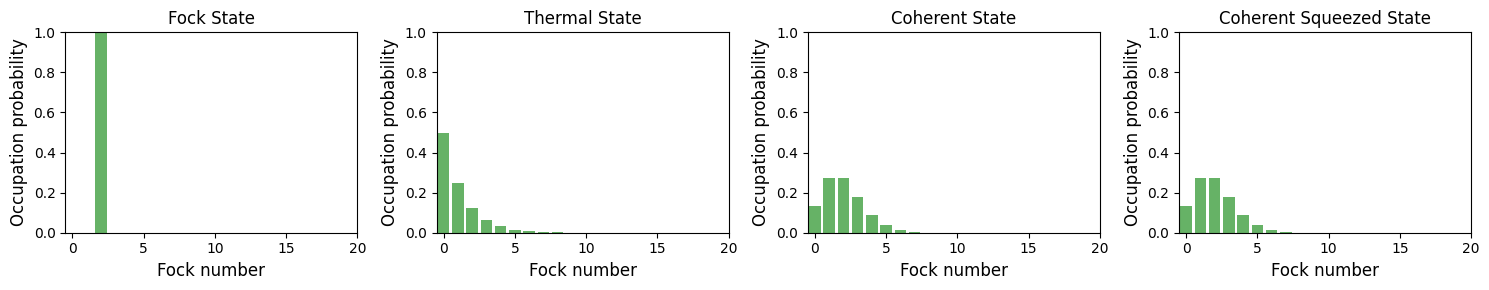

In [15]:
# Initialize a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# Plot the Fock distribution of each state
plot_fock_distribution(rho_fock, fig=fig, ax=axes[0], title='Fock State')
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title='Thermal State')
plot_fock_distribution(rho_coherent, fig=fig, ax=axes[2], title='Coherent State')
plot_fock_distribution(rho_coherent, fig=fig, ax=axes[3], title='Coherent Squeezed State')

fig.tight_layout()  # Automatically adjust subplot parameters to give specified padding